In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.utils import resample
import itertools
from sklearn.model_selection import GridSearchCV
from keras.utils import np_utils
%matplotlib inline

Using TensorFlow backend.


In [4]:
df_pca = pd.read_csv("pca_data.csv")

In [7]:
df_pca = df_pca.drop("Unnamed: 0",axis=1)

In [8]:
df_pca.head()

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,...,Principal Component 82,Principal Component 83,Principal Component 84,Principal Component 85,Principal Component 86,Principal Component 87,Principal Component 88,Principal Component 89,Principal Component 90,Release Decade
0,-0.150333,-0.071206,0.035277,0.078159,0.010680,0.013304,-0.019755,-0.026418,-0.018521,-0.046058,...,0.001183,-0.001290,-0.004443,-0.000603,0.001508,-0.002278,-0.002729,-0.000815,-0.002403,2000
1,-0.127587,-0.042643,-0.039528,0.030215,0.055388,-0.029260,-0.044218,-0.043042,0.024067,-0.017534,...,0.005864,0.008839,0.003453,0.005332,0.006288,-0.000495,0.002620,0.000646,-0.002889,2000
2,-0.173302,-0.032196,0.000596,0.036082,0.019383,-0.006957,-0.007135,-0.040764,-0.023660,-0.005569,...,-0.001461,-0.003321,-0.001130,-0.002359,0.003970,0.003404,-0.001038,-0.003000,0.004577,2000
3,-0.104943,-0.114886,0.054070,-0.024135,0.055518,-0.013094,-0.010121,-0.011146,0.000877,-0.002956,...,0.005481,0.002250,0.009814,0.006775,0.000168,0.000743,0.007096,-0.001337,-0.002772,2000
4,-0.167919,-0.048979,0.009335,0.051351,0.022709,0.004066,-0.054789,-0.016897,0.027231,-0.020771,...,0.005635,-0.004517,-0.001881,-0.001931,0.001328,0.006725,-0.005325,0.003686,0.000467,2000


C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Samples in the dataset/release decade')

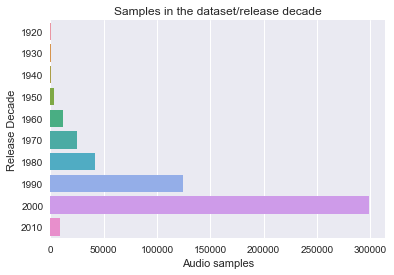

In [11]:
sns.countplot(y="Release Decade", data=df_pca)
plt.xlabel("Audio samples")
plt.ylabel("Release Decade")
plt.title("Samples in the dataset/release decade")

In [14]:
df_pca_copy = df_pca

In [36]:
def year_change(year):
    if year!=2000:
        return 0
    else:
        return 1

In [37]:
df_pca_copy['Release Decade'] = df_pca_copy['Release Decade'].apply(year_change)

In [38]:
df_pca_copy.head()

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,...,Principal Component 82,Principal Component 83,Principal Component 84,Principal Component 85,Principal Component 86,Principal Component 87,Principal Component 88,Principal Component 89,Principal Component 90,Release Decade
0,-0.150333,-0.071206,0.035277,0.078159,0.010680,0.013304,-0.019755,-0.026418,-0.018521,-0.046058,...,0.001183,-0.001290,-0.004443,-0.000603,0.001508,-0.002278,-0.002729,-0.000815,-0.002403,1
1,-0.127587,-0.042643,-0.039528,0.030215,0.055388,-0.029260,-0.044218,-0.043042,0.024067,-0.017534,...,0.005864,0.008839,0.003453,0.005332,0.006288,-0.000495,0.002620,0.000646,-0.002889,1
2,-0.173302,-0.032196,0.000596,0.036082,0.019383,-0.006957,-0.007135,-0.040764,-0.023660,-0.005569,...,-0.001461,-0.003321,-0.001130,-0.002359,0.003970,0.003404,-0.001038,-0.003000,0.004577,1
3,-0.104943,-0.114886,0.054070,-0.024135,0.055518,-0.013094,-0.010121,-0.011146,0.000877,-0.002956,...,0.005481,0.002250,0.009814,0.006775,0.000168,0.000743,0.007096,-0.001337,-0.002772,1
4,-0.167919,-0.048979,0.009335,0.051351,0.022709,0.004066,-0.054789,-0.016897,0.027231,-0.020771,...,0.005635,-0.004517,-0.001881,-0.001931,0.001328,0.006725,-0.005325,0.003686,0.000467,1


In [39]:
X_train, X_test, y_train, y_test = train_test_split(df_pca.iloc[:,:-1], df_pca.iloc[:,-1], test_size = 0.2, random_state = 0,stratify =  df_pca.iloc[:,-1])

In [40]:
print(X_train.shape),print(X_test.shape),print(y_train.shape),print(y_test.shape)

(412276, 90)
(103069, 90)
(412276,)
(103069,)


(None, None, None, None)

In [41]:
# define early stopping callback
from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')

In [42]:
from keras.callbacks import ModelCheckpoint
modelcheck = ModelCheckpoint('C:\\Users\\Lenovo\\Desktop\\ML\\Data Mining and Decision Models\\Decision Models Assignment\\checkpoints\\classifier_checkpoint.hdf5',monitor='val_acc',verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)

In [43]:
from time import time
from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir="logs/{}".format(time()),histogram_freq=1, batch_size=32, write_graph=True, write_grads=True,write_images=True)

In [44]:
callbacks_list=[tensorboard,earlystop,modelcheck]

In [45]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [46]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 60, activation = 'relu', input_dim = df_pca.shape[1]-1))
classifier.add(Dropout(0.2))

# Adding the second hidden layer
classifier.add(Dense(units = 30,  activation = 'relu'))
classifier.add(Dropout(0.2))

# Adding the second hidden layer
classifier.add(Dense(units = 30, activation = 'relu'))
classifier.add(Dropout(0.2))

# Adding the output layer
classifier.add(Dense(units =1,  activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 60)                5460      
_________________________________________________________________
dropout_10 (Dropout)         (None, 60)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 30)                1830      
_________________________________________________________________
dropout_11 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 30)                930       
_________________________________________________________________
dropout_12 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 31        
Total para

In [47]:
classifier.fit(X_train, y_train.values, batch_size = 32, epochs = 25,callbacks=callbacks_list,validation_data=(X_test, y_test.values))

Train on 412276 samples, validate on 103069 samples
Epoch 1/25
412276/412276 [==============================] - 89s 215us/step - loss: 0.5367 - acc: 0.7406 - val_loss: 0.5165 - val_acc: 0.7541
Epoch 2/25
412276/412276 [==============================] - 81s 197us/step - loss: 0.5222 - acc: 0.7510 - val_loss: 0.5125 - val_acc: 0.7562
Epoch 3/25
412276/412276 [==============================] - 81s 197us/step - loss: 0.5187 - acc: 0.7530 - val_loss: 0.5099 - val_acc: 0.7575
Epoch 4/25
412276/412276 [==============================] - 81s 197us/step - loss: 0.5161 - acc: 0.7544 - val_loss: 0.5093 - val_acc: 0.7579
Epoch 5/25
412276/412276 [==============================] - 81s 197us/step - loss: 0.5142 - acc: 0.7557 - val_loss: 0.5078 - val_acc: 0.7587
Epoch 6/25
412276/412276 [==============================] - 81s 196us/step - loss: 0.5132 - acc: 0.7570 - val_loss: 0.5081 - val_acc: 0.7594
Epoch 7/25
412276/412276 [==============================] - 80s 195us/step - loss: 0.5124 - acc: 0.757

In [48]:
df_pca['Release Decade'].value_counts()

1    299003
0    216342
Name: Release Decade, dtype: int64

In [62]:
classifier.save_weights("classifier_2000.h5")

In [50]:
299003/515345

0.5801996720643452

In [54]:
df_pca = pd.read_csv("pca_data.csv")

In [55]:
df_pca = df_pca.drop("Unnamed: 0",axis=1)

In [57]:
def year_change(year):
    if year!=1990:
        return 0
    else:
        return 1

In [59]:
df_pca['Release Decade'] = df_pca['Release Decade'].apply(year_change)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(df_pca.iloc[:,:-1], df_pca.iloc[:,-1], test_size = 0.2, random_state = 0,stratify =  df_pca.iloc[:,-1])

In [61]:
# Initialising the ANN
classifier_1990 = Sequential()

# Adding the input layer and the first hidden layer
classifier_1990.add(Dense(units = 60, activation = 'relu', input_dim = df_pca.shape[1]-1))
classifier_1990.add(Dropout(0.2))

# Adding the second hidden layer
classifier_1990.add(Dense(units = 30,  activation = 'relu'))
classifier_1990.add(Dropout(0.2))

# Adding the second hidden layer
classifier_1990.add(Dense(units = 30, activation = 'relu'))
classifier_1990.add(Dropout(0.2))

# Adding the output layer
classifier_1990.add(Dense(units =1,  activation = 'sigmoid'))

# Compiling the ANN
classifier_1990.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier_1990.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 60)                5460      
_________________________________________________________________
dropout_13 (Dropout)         (None, 60)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 30)                1830      
_________________________________________________________________
dropout_14 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 30)                930       
_________________________________________________________________
dropout_15 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 31        
Total para

In [63]:
classifier_1990.fit(X_train, y_train.values, batch_size = 32, epochs = 25,callbacks=callbacks_list,validation_data=(X_test, y_test.values))

Train on 412276 samples, validate on 103069 samples
Epoch 1/25
412276/412276 [==============================] - 100s 241us/step - loss: 0.5042 - acc: 0.7619 - val_loss: 0.4903 - val_acc: 0.7703


InvalidArgumentError: You must feed a value for placeholder tensor 'dense_16_sample_weights' with dtype float and shape [?]
	 [[Node: dense_16_sample_weights = Placeholder[dtype=DT_FLOAT, shape=[?], _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]
	 [[Node: dense_14/bias_0_grad/values/_583 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_476_dense_14/bias_0_grad/values", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'dense_16_sample_weights', defined at:
  File "C:\Users\Lenovo\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Lenovo\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Lenovo\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\Lenovo\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\Lenovo\Anaconda3\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Users\Lenovo\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Lenovo\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\Lenovo\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\Lenovo\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\Lenovo\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\Lenovo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\Lenovo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\Lenovo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-46-886a37a0cf3e>", line 20, in <module>
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  File "C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\models.py", line 863, in compile
    **kwargs)
  File "C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\engine\training.py", line 802, in compile
    name=name + '_sample_weights'))
  File "C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py", line 508, in placeholder
    x = tf.placeholder(dtype, shape=shape, name=name)
  File "C:\Users\Lenovo\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\ops\array_ops.py", line 1808, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\Users\Lenovo\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\ops\gen_array_ops.py", line 5835, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "C:\Users\Lenovo\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\Lenovo\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\ops.py", line 3392, in create_op
    op_def=op_def)
  File "C:\Users\Lenovo\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'dense_16_sample_weights' with dtype float and shape [?]
	 [[Node: dense_16_sample_weights = Placeholder[dtype=DT_FLOAT, shape=[?], _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]
	 [[Node: dense_14/bias_0_grad/values/_583 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_476_dense_14/bias_0_grad/values", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


In [64]:
classifier_1990.save_weights('classifier_1990.h5')

In [65]:
df_pca['Release Decade'].value_counts()

0    390632
1    124713
Name: Release Decade, dtype: int64

In [66]:
124713/df_pca.shape[0]

0.24199904918064596

In [67]:
0.7619

0.7619